<h1><center> Departamento de recursos humanos </center></h1>

* Los propietarios de pymes dedican el 40% de jornada laboral a tareas de contratación y gastan entre 15% y 20% del salario del empleado para contratar uno nuevo - La empresa pierde entre el 1% y 2.5% de sus ingresos totales en el tiempo que lleva orientar al nuevo empleado - En promedio, se necesita 52 dias para cubrir un puesto
* Objetivo: Recopilar los datos de la empresa sobre sus empleados y desarrollar un modelo predictivo sobre los empleados con probabilidad a renunciar.

<img src=https://www.bizneo.com/blog/wp-content/uploads/2020/03/ejemplo-gestion-recursos-humanos-810x455.webp>

##  Importar librerias

In [1]:
import pandas as pd  # Importa la biblioteca pandas y la renombra como pd
from scipy import stats  # Importa el módulo stats de la biblioteca scipy
import numpy as np  # Importa la biblioteca numpy y la renombra como np
from numpy.random import randn  # Importa la función randn del módulo random de numpy
import seaborn as sns  # Importa la biblioteca seaborn y la renombra como sns
import matplotlib as mpl  # Importa la biblioteca matplotlib y la renombra como mpl
import matplotlib.pyplot as plt  # Importa el módulo pyplot de la biblioteca matplotlib y lo renombra como plt

In [2]:
data = pd.read_csv("Human_Resources.csv") # Importamos la base de datos y la nombramos data

In [3]:
data.head(5) # primeras 5 filas

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
data.tail(5) # ultimas 5 filas

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


### -  Esta formada por la ubicación del empleado, educación, area de trabajo, edad, participación-satisfacción laboral, horas de trabajo, balance de vida con trabajo , experiencia en el area y perdida de empleado. 


### -  Las variables 'Attritition', 'Over18 y 'Overtime' categoricas Yes y NO seran corregidas a numeros enteros 1 y 0 por  antes de poder llevar a cabo cualquier visualización



In [5]:
data['Attrition'] = data['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)
# Asigna 1 a los valores 'Yes' en la columna 'Attrition' y 0 a los demás valores

data['OverTime'] = data['OverTime'].apply(lambda x: 1 if x == 'Yes' else 0)
# Asigna 1 a los valores 'Yes' en la columna 'OverTime' y 0 a los demás valores

data['Over18'] = data['Over18'].apply(lambda x: 1 if x == 'Y' else 0)
# Asigna 1 a los valores 'Y' en la columna 'Over18' y 0 a los demás valores

##### Verificamos los cambios

In [6]:
data.tail(4)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,0,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


##### Verificar si existen Datos Faltantes

<Axes: >

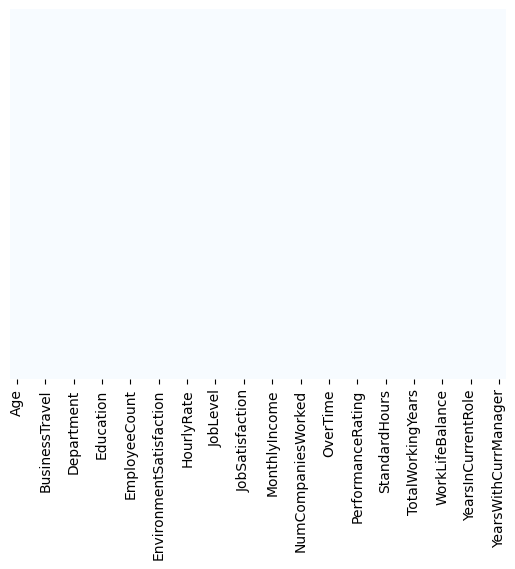

In [7]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap = "Blues")

##### - Luego del pre-procesamiento de los datos es elegible visualizar el comportamiento de los datos la distribución entre ellas

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Attrition'}>,
        <Axes: title={'center': 'DailyRate'}>,
        <Axes: title={'center': 'DistanceFromHome'}>,
        <Axes: title={'center': 'Education'}>],
       [<Axes: title={'center': 'EmployeeCount'}>,
        <Axes: title={'center': 'EmployeeNumber'}>,
        <Axes: title={'center': 'EnvironmentSatisfaction'}>,
        <Axes: title={'center': 'HourlyRate'}>,
        <Axes: title={'center': 'JobInvolvement'}>],
       [<Axes: title={'center': 'JobLevel'}>,
        <Axes: title={'center': 'JobSatisfaction'}>,
        <Axes: title={'center': 'MonthlyIncome'}>,
        <Axes: title={'center': 'MonthlyRate'}>,
        <Axes: title={'center': 'NumCompaniesWorked'}>],
       [<Axes: title={'center': 'Over18'}>,
        <Axes: title={'center': 'OverTime'}>,
        <Axes: title={'center': 'PercentSalaryHike'}>,
        <Axes: title={'center': 'PerformanceRating'}>,
        <Axes: title={'center': 'Relations

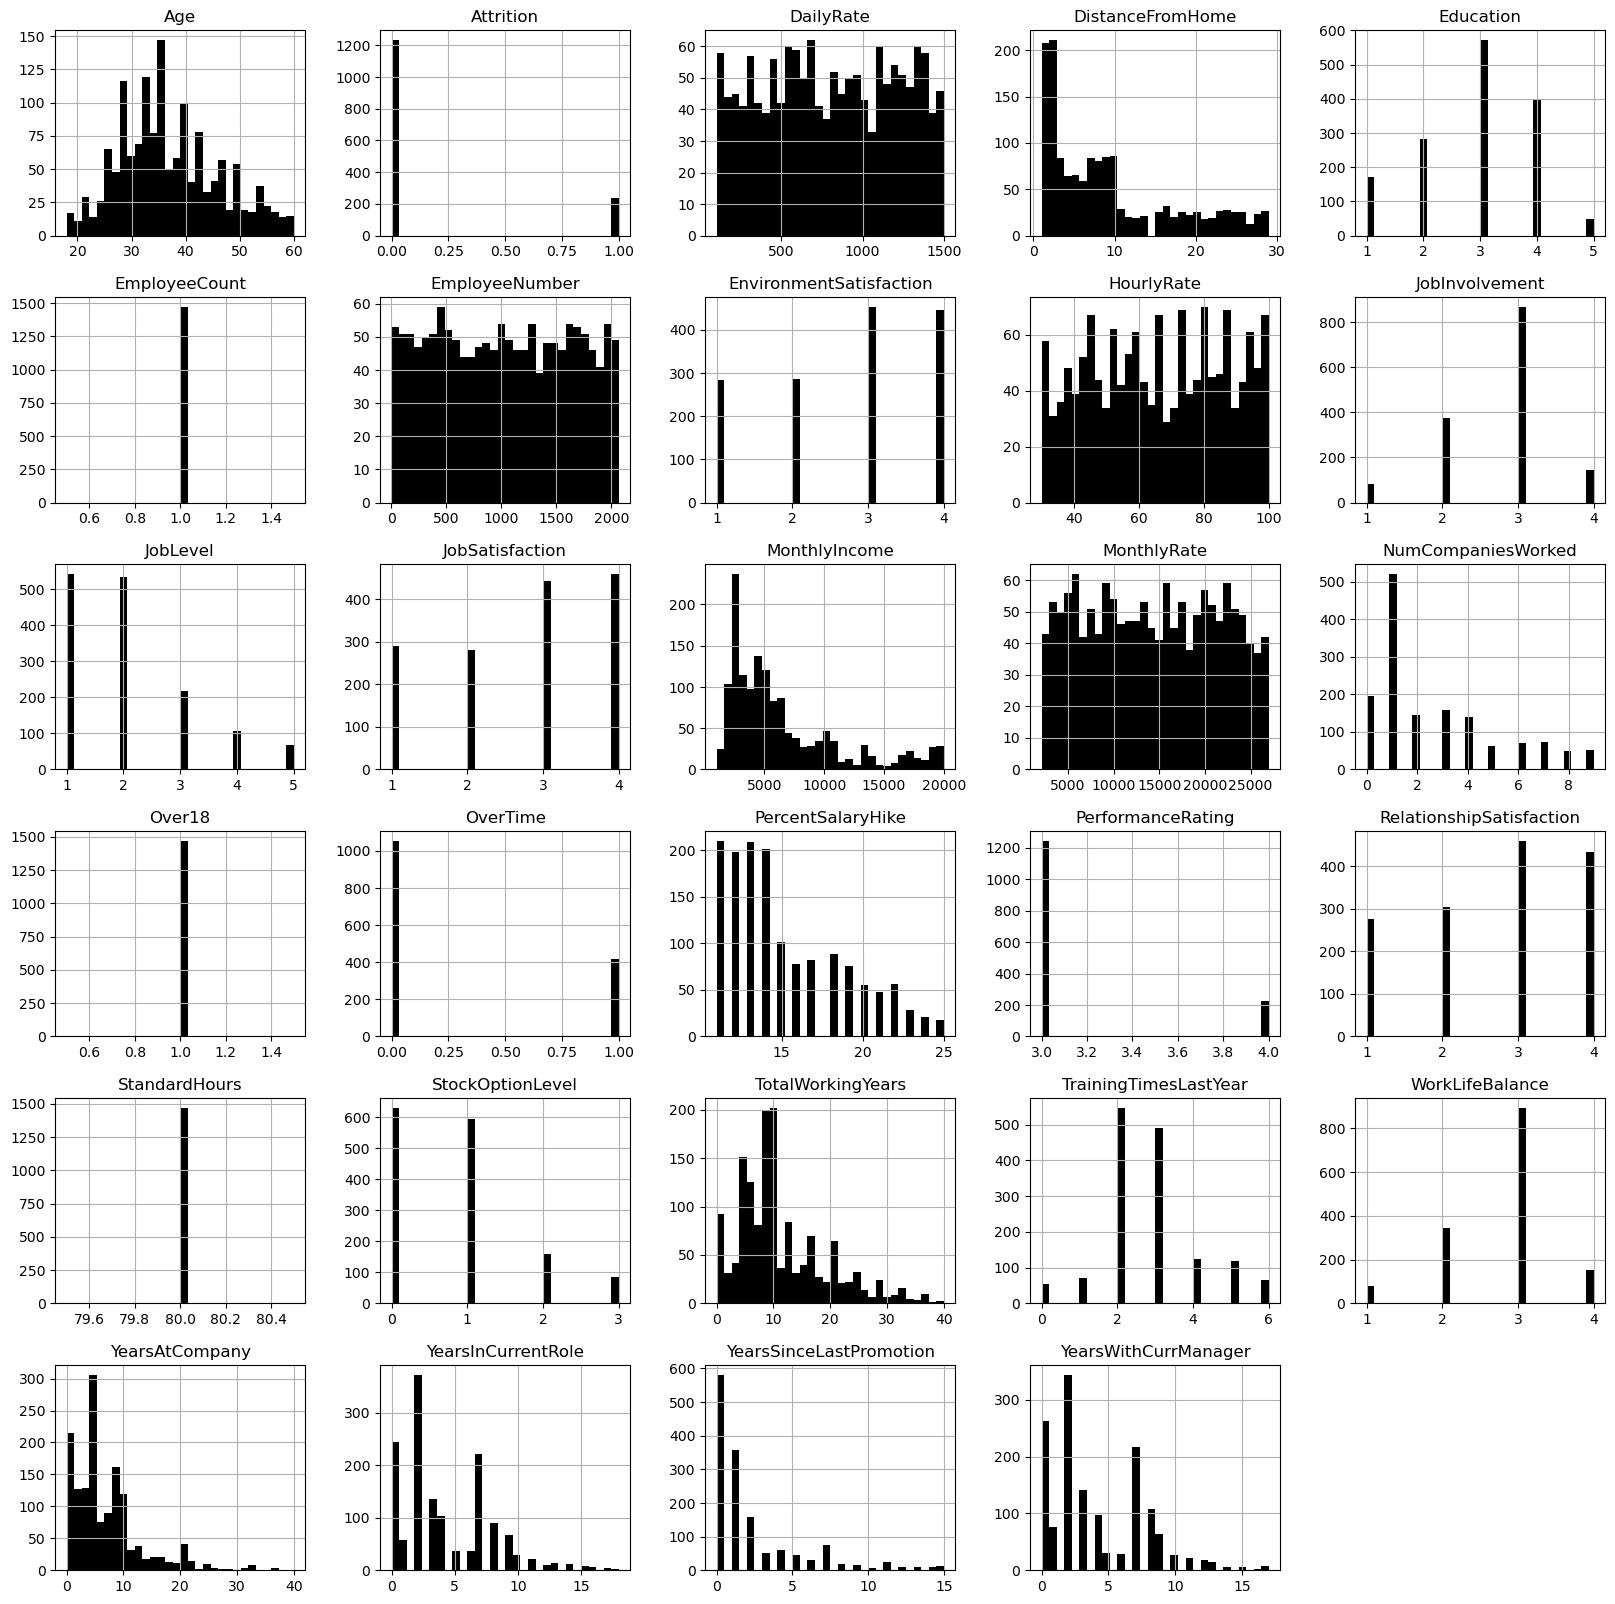

In [8]:
data.hist(bins=30, figsize=(20,20), color = 'black')

- DistanceFromHome, monthyincome, totalworking tienen una cola larga distribucion exponencial 
- 'Employeecount' y ' standarshours' no tienen un cambio significativo 
#### Tiene sentido eliminar de 'EmployeeCount', 'EmployeeNumber' , 'Standardhours' y 'Over18' ya que son campos que no cambian de un empleado a otro.

In [9]:
data.drop(["EmployeeCount", "StandardHours", "Over18", "EmployeeNumber"], axis = 1, inplace = True)

<h1><center>
Verificar cuantos empleados dejan la empresa
    </center></h1>

In [10]:
left   = data[data['Attrition'] == 1] # Contamos el número de empleados que se fueron
stayed = data[data['Attrition'] == 0] # y que se quedaron  


print("Total = ", len(data))

print("Número de empleados que dejan la empresa = ", len(left))
print("Porcentaje de empleados que dejan la empresa = ", 1.*len(left)/len(data)*100.0, "%")

print("Número de empleados que permanecen en la empresa = ", len(stayed))
print("Porcentaje de empleados que se quedan en la empresa = ", 1.*len(stayed)/len(data)*100.0, "%")

Total =  1470
Número de empleados que dejan la empresa =  237
Porcentaje de empleados que dejan la empresa =  16.122448979591837 %
Número de empleados que permanecen en la empresa =  1233
Porcentaje de empleados que se quedan en la empresa =  83.87755102040816 %


- Parece que estamos ante un conjunto de datos desequilibrado


In [11]:
left.describe() # Calcula estadísticas descriptivas del DataFrame 'left' y las muestra en pantalla

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,...,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,1.0,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,...,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,0.0,401.899519,8.452525,1.008244,1.169791,20.099958,0.773405,0.940594,1.118058,...,0.363735,1.125437,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,1.0,103.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.0,408.000000,3.000000,2.000000,1.000000,50.000000,2.000000,1.000000,1.000000,...,3.000000,2.000000,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,1.0,699.000000,9.000000,3.000000,3.000000,66.000000,3.000000,1.000000,3.000000,...,3.000000,3.000000,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1.0,1092.000000,17.000000,4.000000,4.000000,84.000000,3.000000,2.000000,3.000000,...,3.000000,4.000000,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1.0,1496.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


- Breve resumen del data left. El promedio en edad es 33.6 años, la distancia de casa al trabajo 10.6 km, educación aproximado 3 (Educación superior) y asi sucesivamente

In [12]:
stayed.describe() # Calcula estadísticas descriptivas del DataFrame 'Stayed' y las muestra en pantalla


,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,...,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,0.0,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,...,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,0.0,403.208379,8.012633,1.027002,1.071132,20.380754,0.692050,1.117933,1.093277,...,0.360408,1.071603,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,0.0,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.0,477.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.0,817.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,0.0,1176.000000,13.000000,4.000000,4.000000,83.000000,3.000000,3.000000,4.000000,...,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,0.0,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


- Breve resumen del data stayed. El promedio en edad es 37.5 años, la distancia de casa al trabajo 8.9 km, educación aproximado 3 (Educación superior) y asi sucesivamente


<h1><center> Que variables se correlacionan entre si </center></h1>


</center></h1>

C:\Users\basti\AppData\Local\Temp\ipykernel_27272\4091755087.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = data.corr()


<Axes: >

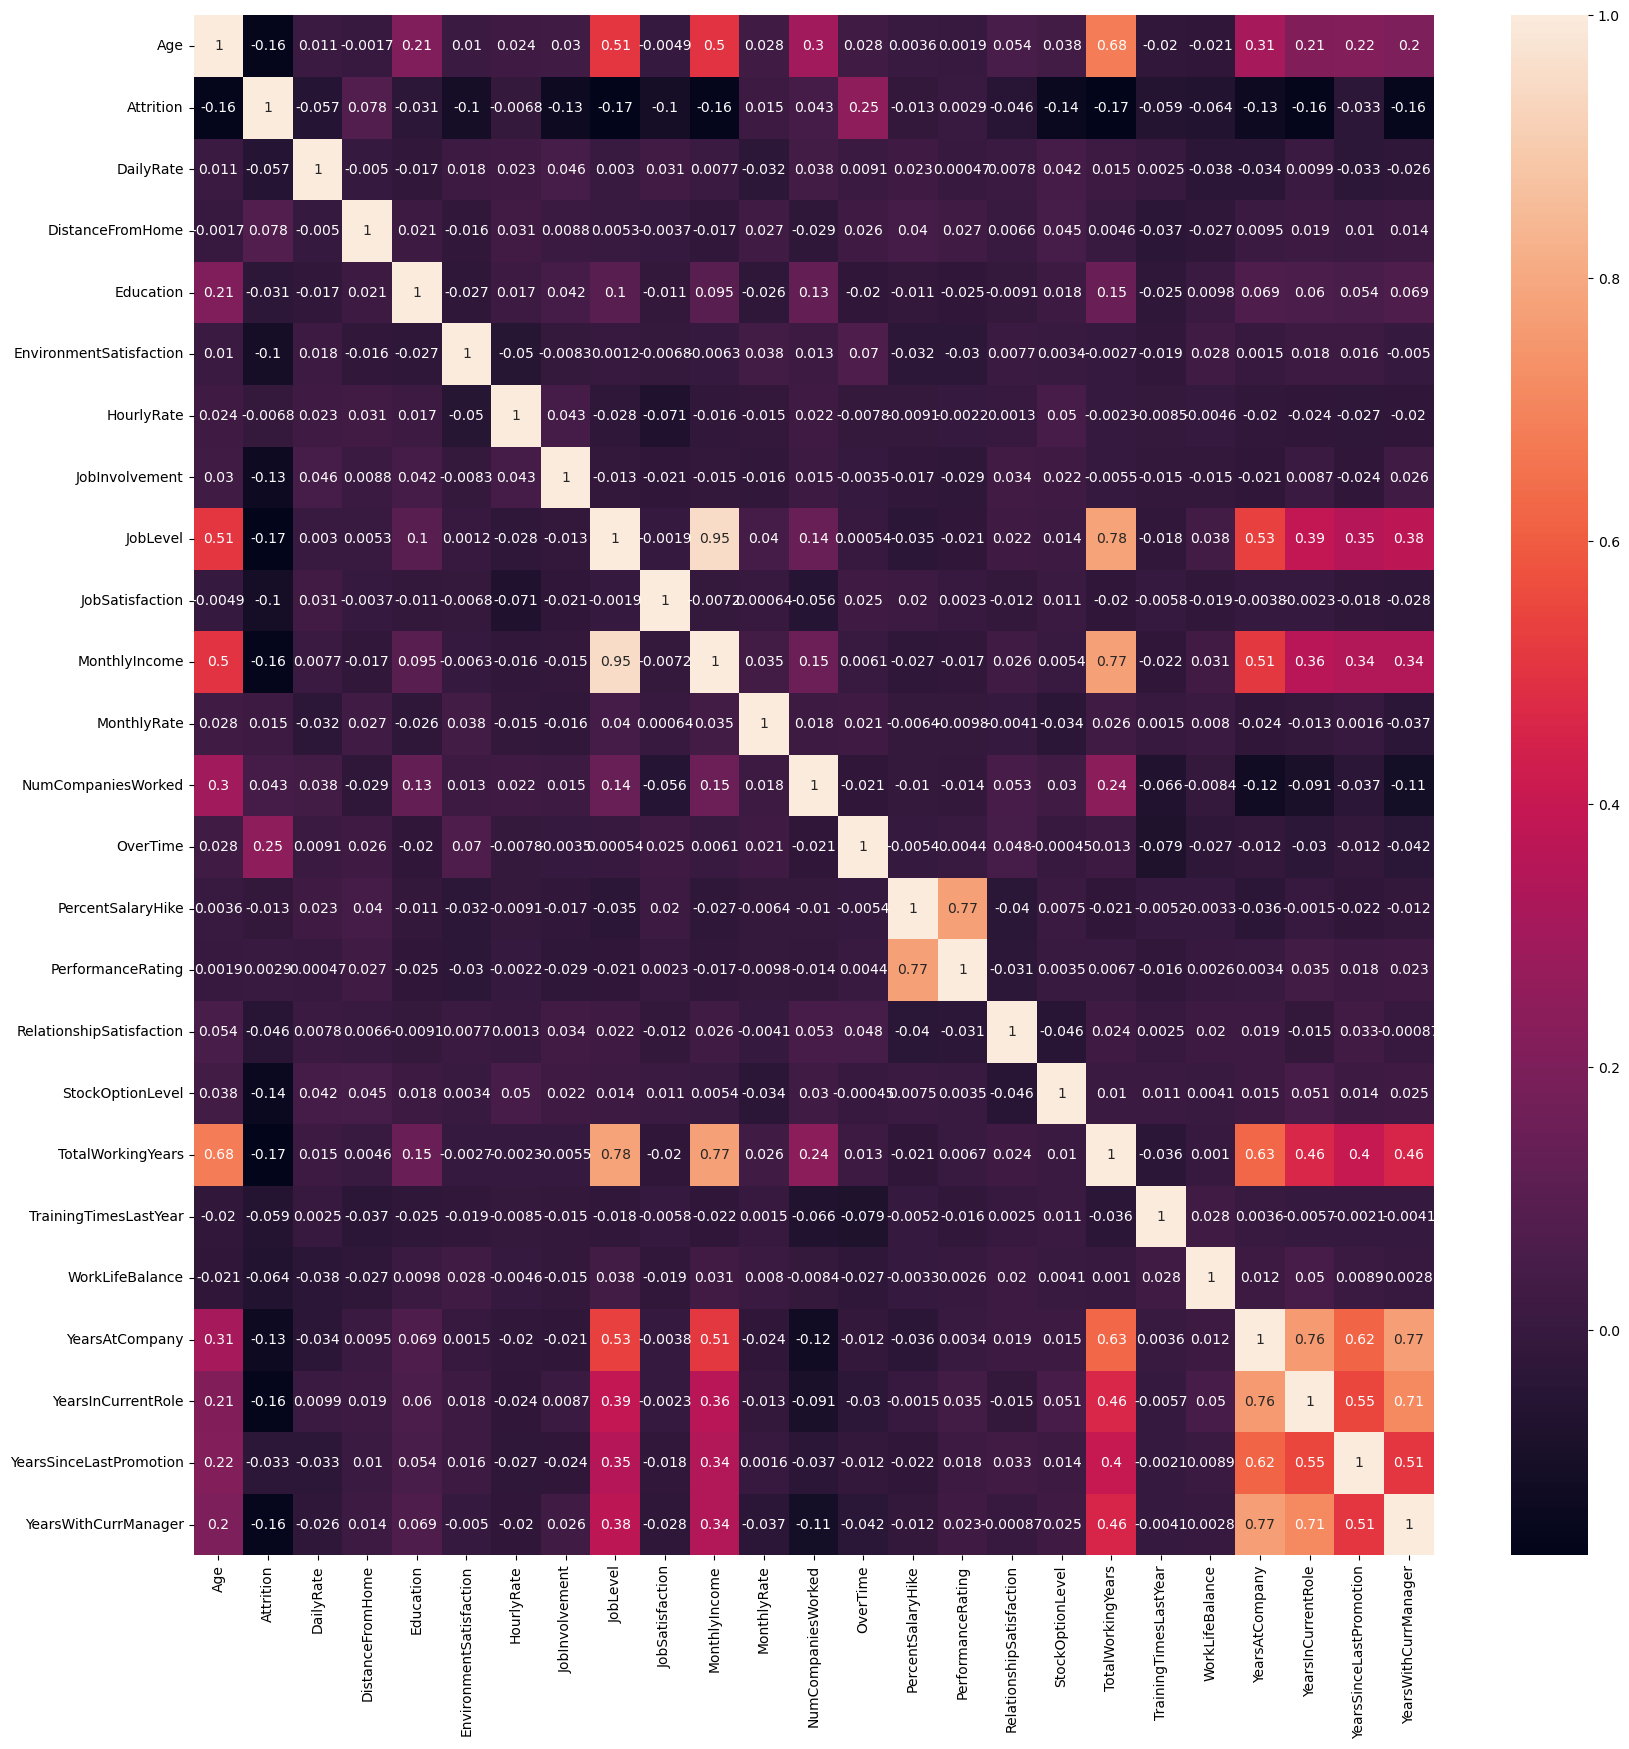

In [13]:
correlations = data.corr()
f, ax = plt.subplots(figsize = (20,20))
sns.heatmap(correlations, annot=True)


#### 1. "Job level" está altamente correlacionado con el número total de horas de trabajo.
#### 2. "Monthly income" está altamente correlacionado con Job level. 
#### 3. "Monthly income" está altamente correlacionado con el número total de horas de trabajo. 
#### 4. "Age" está altamente correlacionado con los ingresos mensuales


### Visualizaremos variables de interes 

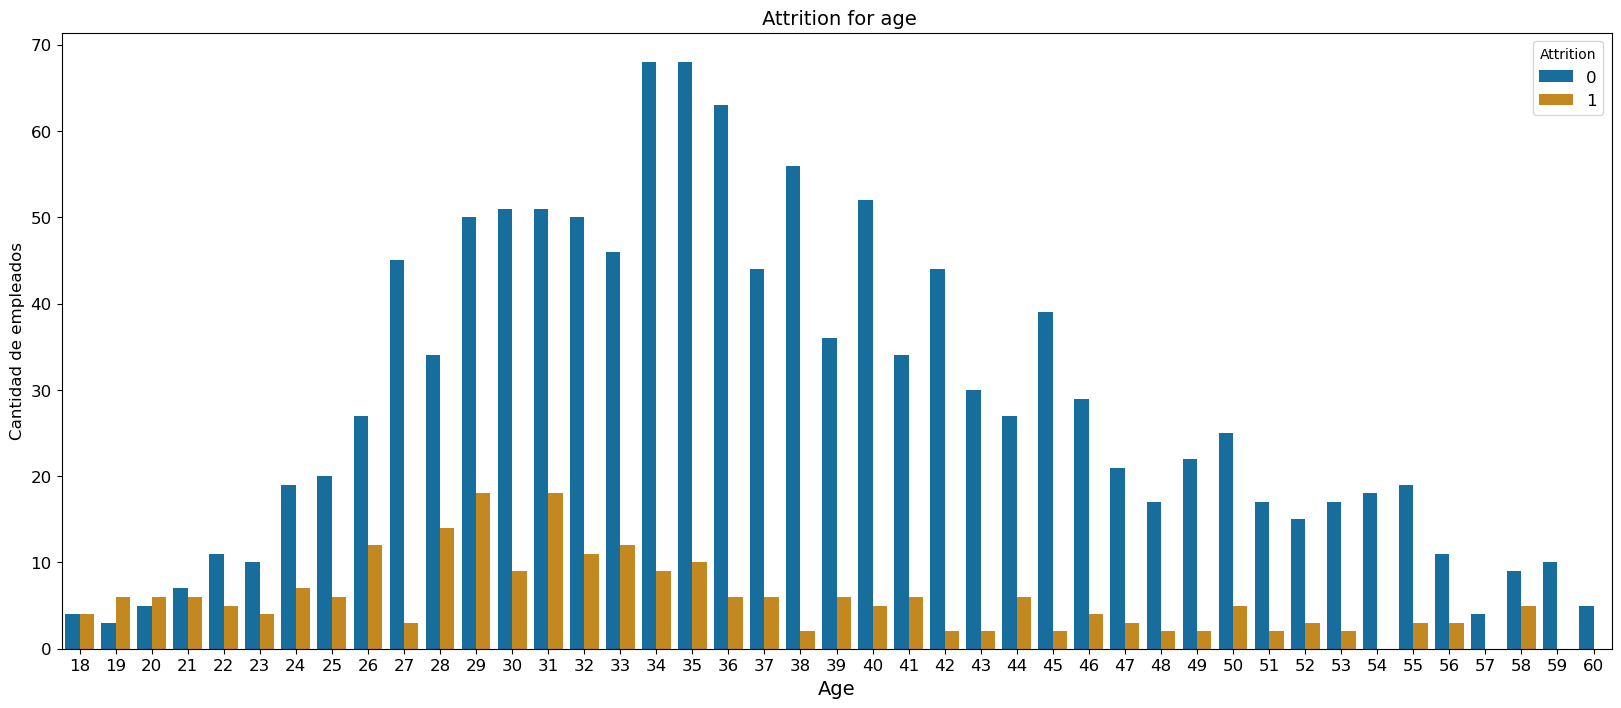

In [14]:
# Creamos el gráfico de barras
plt.figure(figsize=[20, 8])
sns.countplot(x='Age', hue='Attrition', data=data, palette='colorblind')
# Agregamos detalles visuales
plt.xlabel('Age', fontsize=14)
plt.ylabel('Cantidad de empleados', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Attrition', fontsize=12)
# Agregamos título
plt.title(' Attrition for age', fontsize=14)
# Mostramos el gráfico
plt.show()

<Axes: xlabel='JobLevel', ylabel='count'>

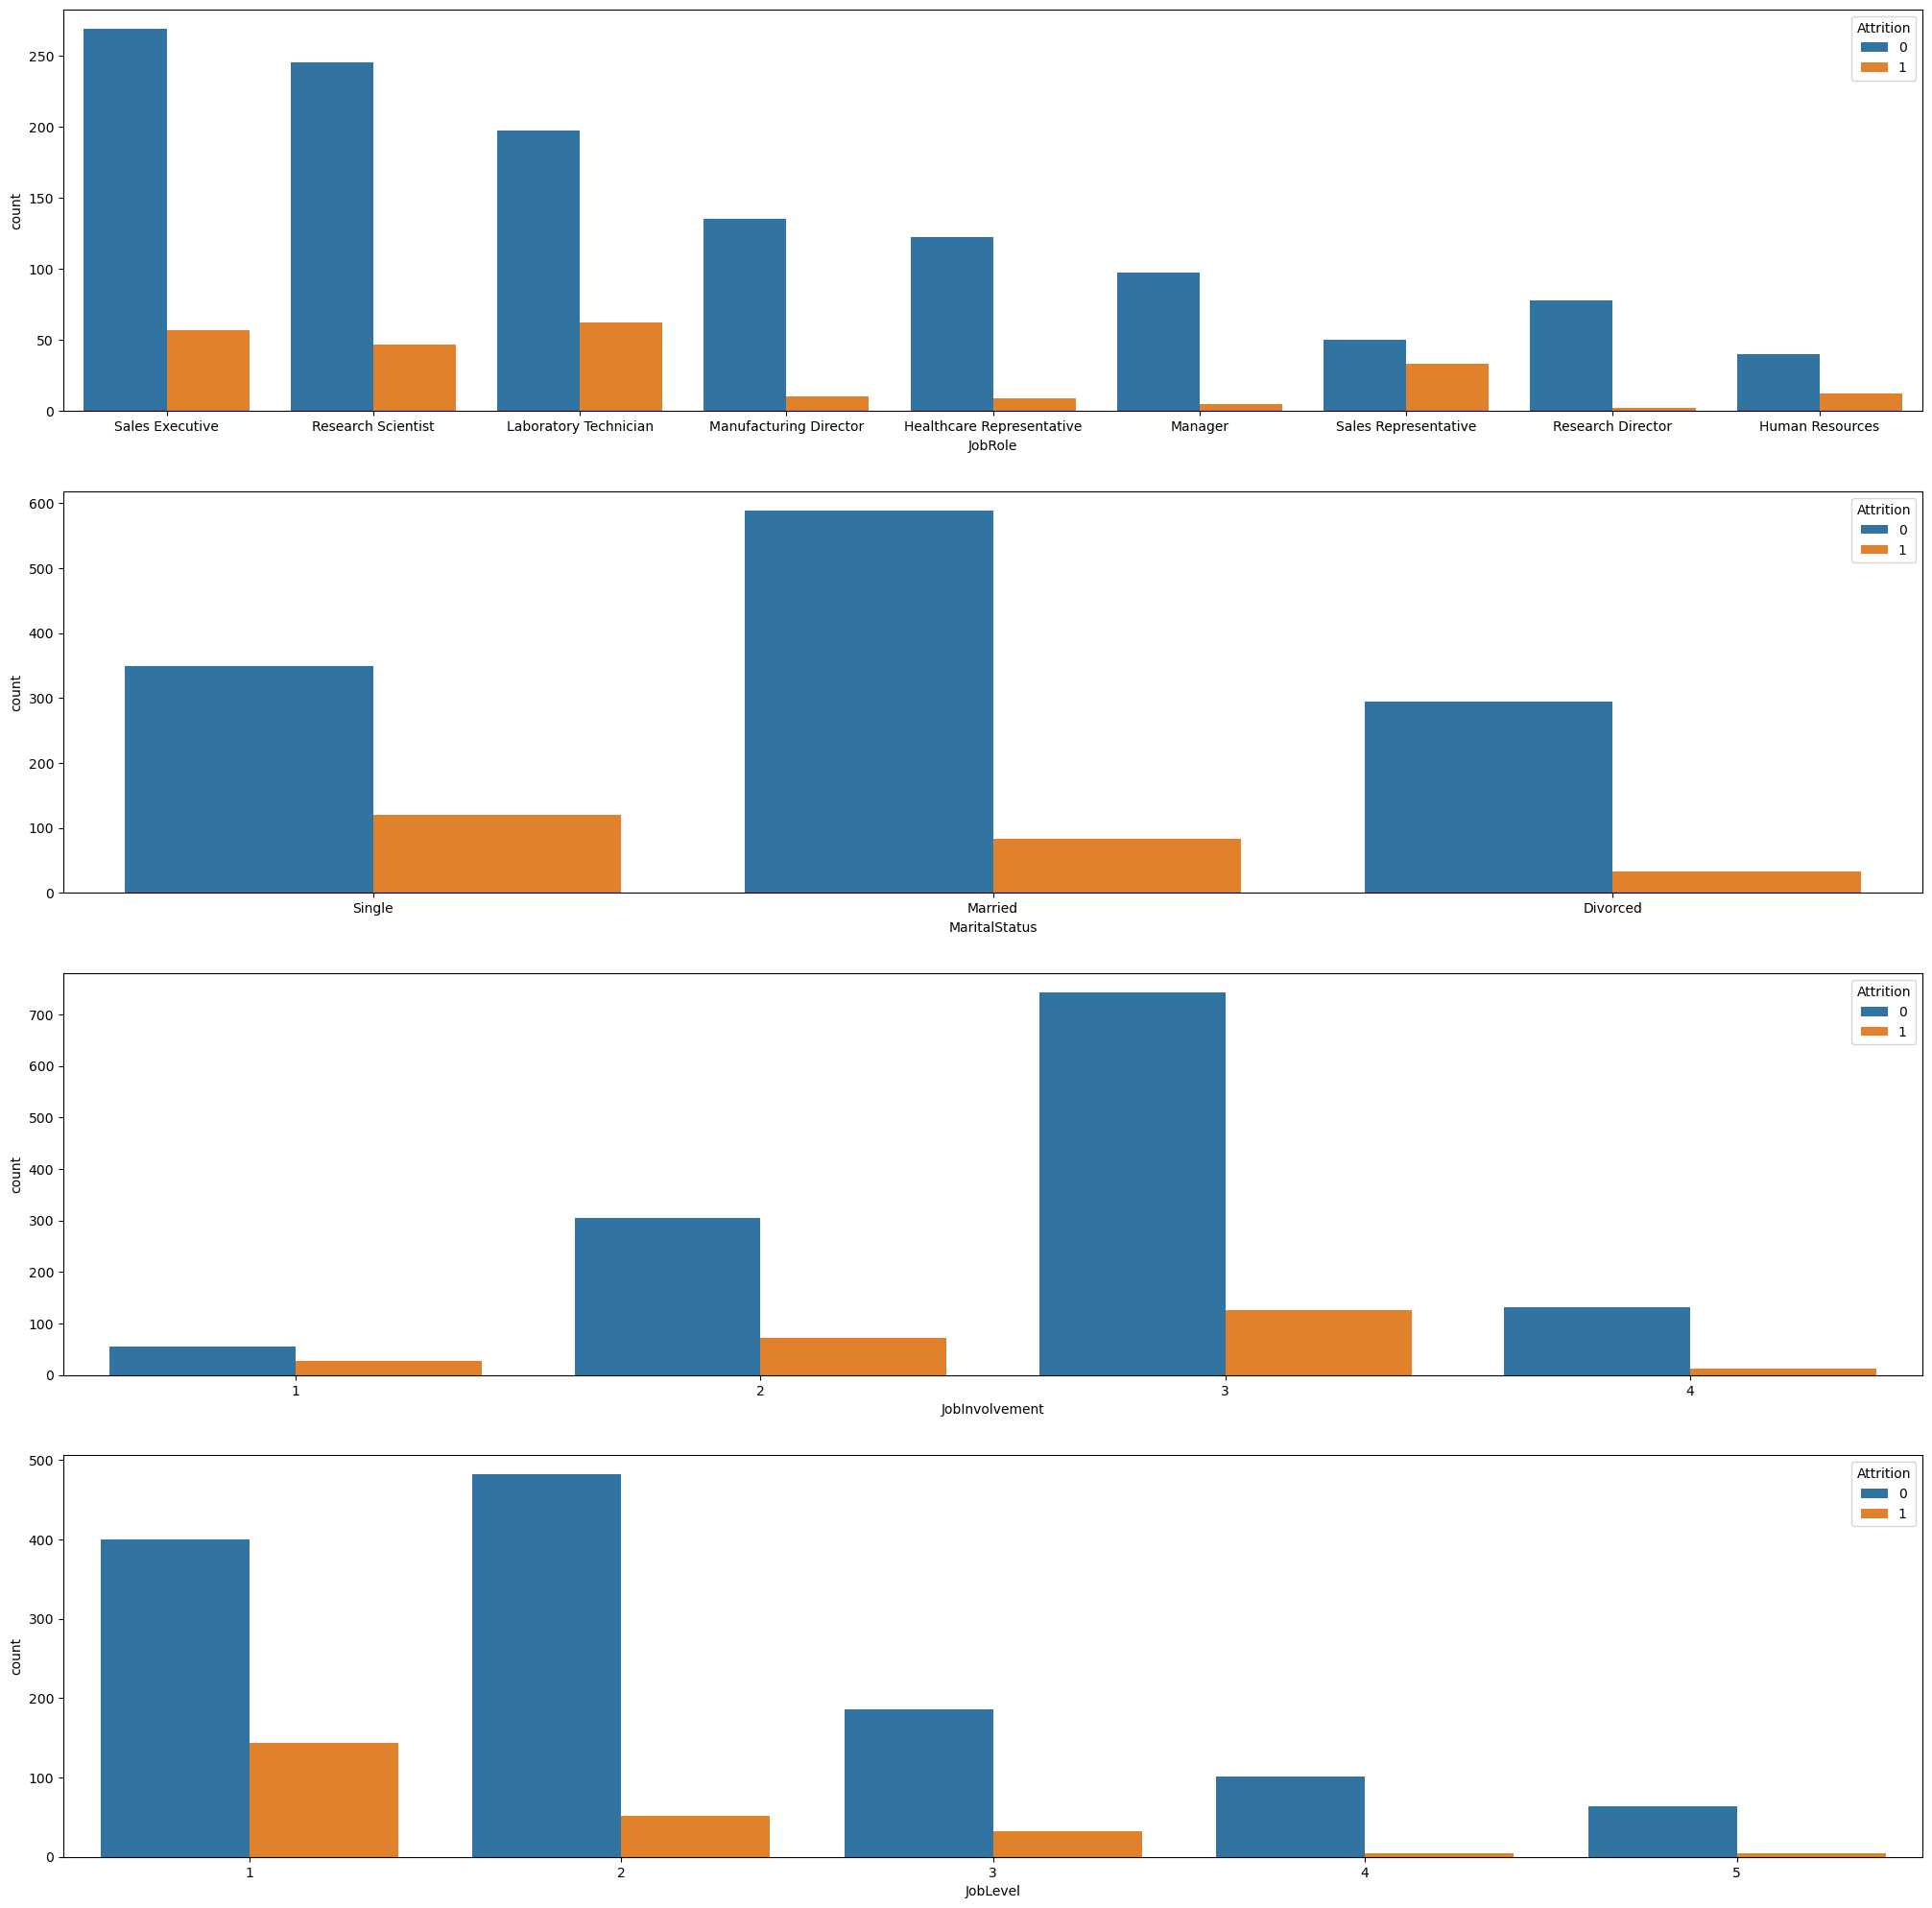

In [15]:
plt.figure(figsize=[25,25])
plt.subplot(411)
sns.countplot(x = 'JobRole', hue = 'Attrition', data = data)
plt.subplot(412)
sns.countplot(x = 'MaritalStatus', hue = 'Attrition', data = data)
plt.subplot(413)
sns.countplot(x = 'JobInvolvement', hue = 'Attrition', data = data)
plt.subplot(414)
sns.countplot(x = 'JobLevel', hue = 'Attrition', data = data)



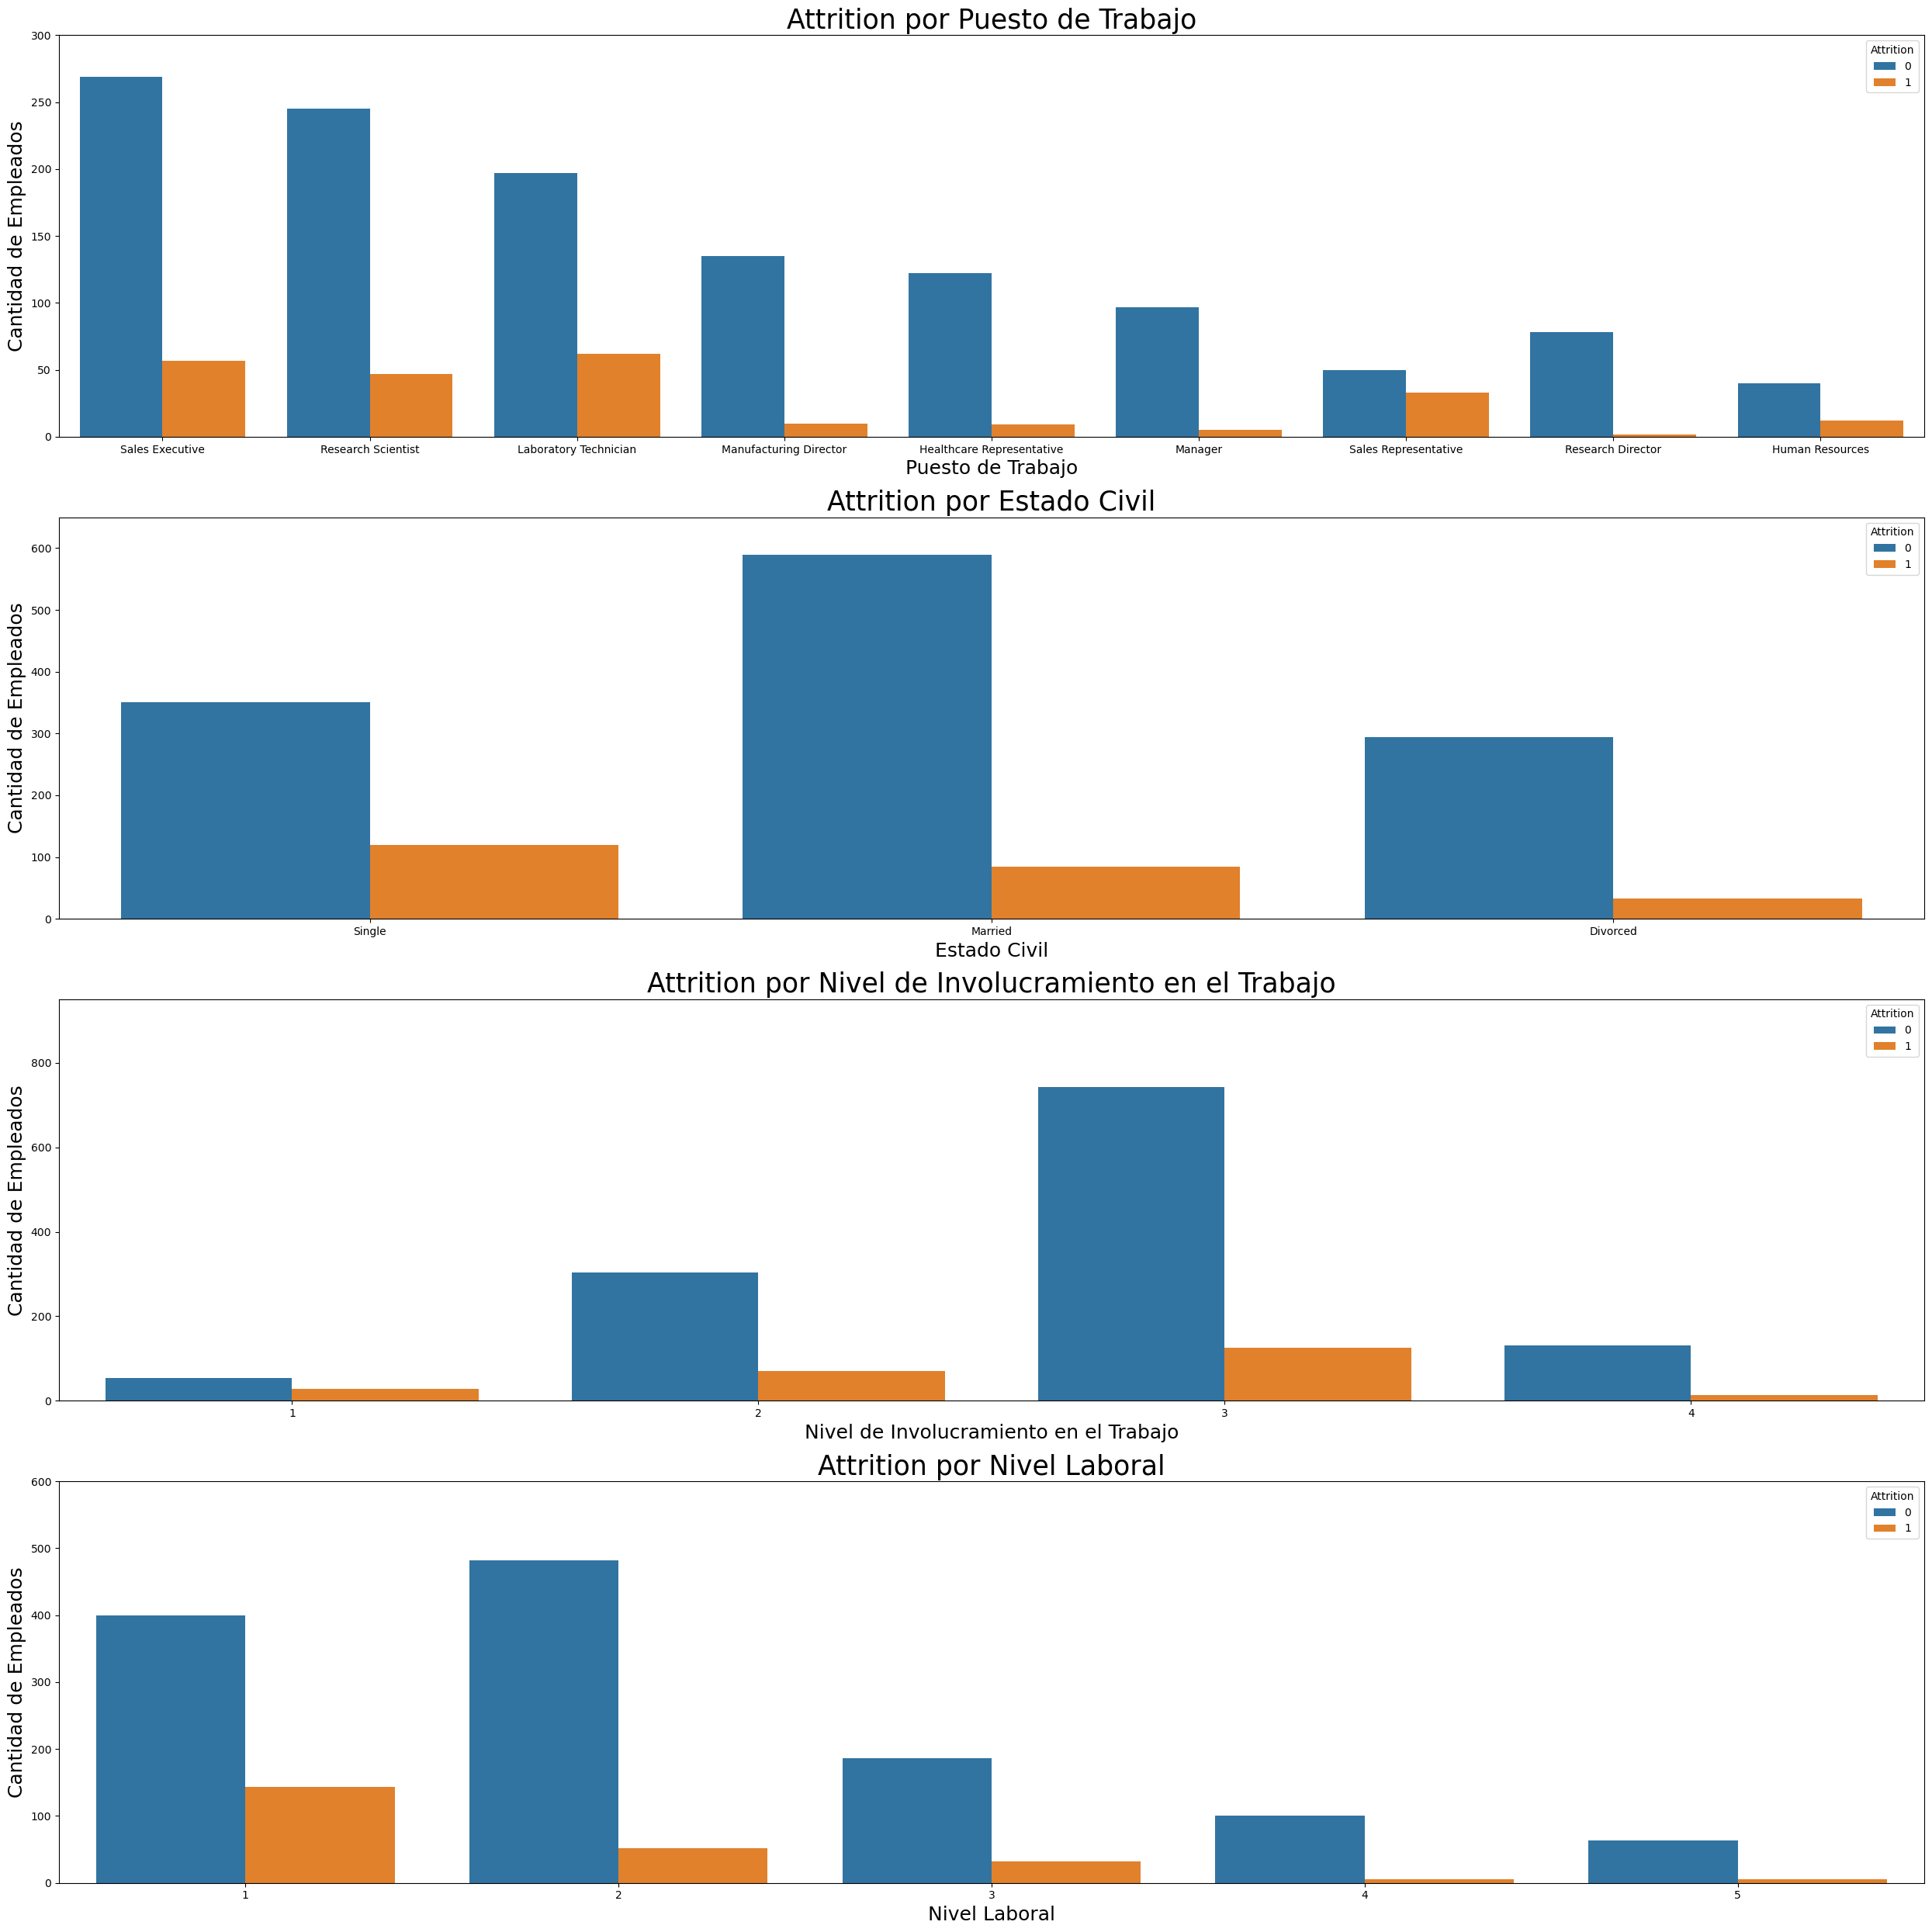

In [16]:
plt.figure(figsize=[25,25])

plt.subplot(411)
sns.countplot(x = 'JobRole', hue = 'Attrition', data = data)
plt.xlabel('Puesto de Trabajo', fontsize=18)
plt.ylabel('Cantidad de Empleados', fontsize=18)
plt.title('Attrition por Puesto de Trabajo', fontsize=25)
plt.ylim(0, 300)

plt.subplot(412)
sns.countplot(x = 'MaritalStatus', hue = 'Attrition', data = data)
plt.xlabel('Estado Civil', fontsize=18)
plt.ylabel('Cantidad de Empleados', fontsize=18)
plt.title('Attrition por Estado Civil', fontsize=25)
plt.ylim(0, 650)

plt.subplot(413)
sns.countplot(x = 'JobInvolvement', hue = 'Attrition', data = data)
plt.xlabel('Nivel de Involucramiento en el Trabajo', fontsize=18)
plt.ylabel('Cantidad de Empleados', fontsize=18)
plt.title('Attrition por Nivel de Involucramiento en el Trabajo', fontsize=25)
plt.ylim(0, 950)

plt.subplot(414)
sns.countplot(x = 'JobLevel', hue = 'Attrition', data = data)
plt.xlabel('Nivel Laboral', fontsize=18)
plt.ylabel('Cantidad de Empleados', fontsize=18)
plt.title('Attrition por Nivel Laboral', fontsize=25)
plt.ylim(0, 600)

plt.tight_layout()


#### Los empleados solteros tienden a irse en comparación con los casados ​​y divorciados
#### Los representantes de ventas tienden a irse en comparación con cualquier otro departamento
#### Los empleados menos involucrados tienden a dejar la empresa
#### Los menos experimentados (nivel laboral bajo) tienden a dejar la empresa

C:\Users\basti\AppData\Local\Temp\ipykernel_27272\2042632889.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(left['DistanceFromHome'], shade = True, color = 'r', label= 'Empleados que se marchan')
C:\Users\basti\AppData\Local\Temp\ipykernel_27272\2042632889.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(stayed['DistanceFromHome'],  shade = True, color = 'b',label= 'Empleados que se quedan')


Text(0.5, 0, 'Distancia desde Casa al Trabajo')

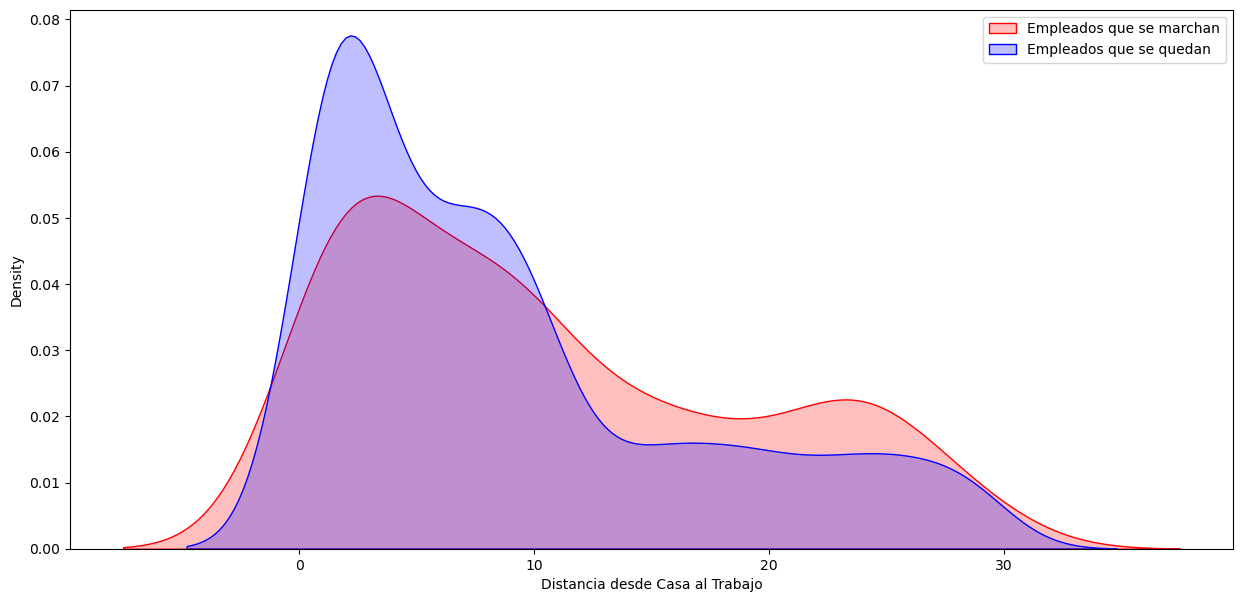

In [17]:
plt.figure(figsize=(15, 7))

sns.kdeplot(left['DistanceFromHome'], shade = True, color = 'r', label= 'Empleados que se marchan')
sns.kdeplot(stayed['DistanceFromHome'],  shade = True, color = 'b',label= 'Empleados que se quedan')
plt.legend()
plt.xlabel('Distancia desde Casa al Trabajo')

C:\Users\basti\AppData\Local\Temp\ipykernel_27272\2872218904.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(left['YearsWithCurrManager'], label = "Empleados que se marchan", shade = True, color = 'r')
C:\Users\basti\AppData\Local\Temp\ipykernel_27272\2872218904.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(stayed['YearsWithCurrManager'], label = "Empleados que se quedan", shade = True, color = 'b')


Text(0.5, 0, 'Años con su Manager Actual')

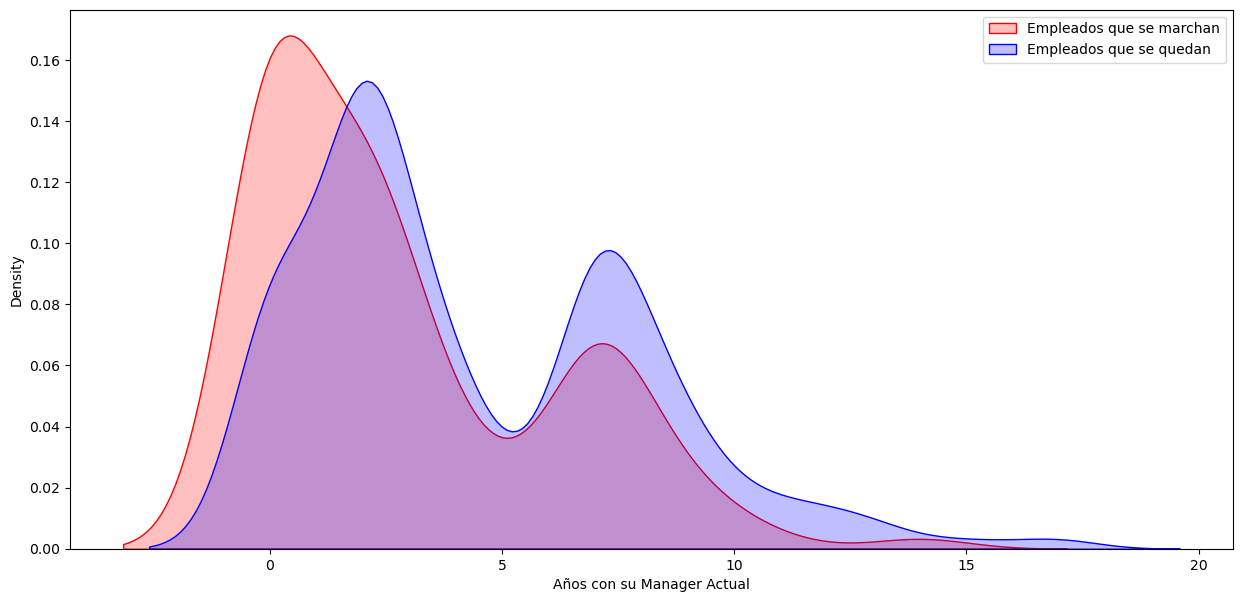

In [18]:
plt.figure(figsize=(15, 7))

sns.kdeplot(left['YearsWithCurrManager'], label = "Empleados que se marchan", shade = True, color = 'r')
sns.kdeplot(stayed['YearsWithCurrManager'], label = "Empleados que se quedan", shade = True, color = 'b')
plt.legend()

plt.xlabel('Años con su Manager Actual')

Text(0.5, 0, 'Número total de años de Trabajo')

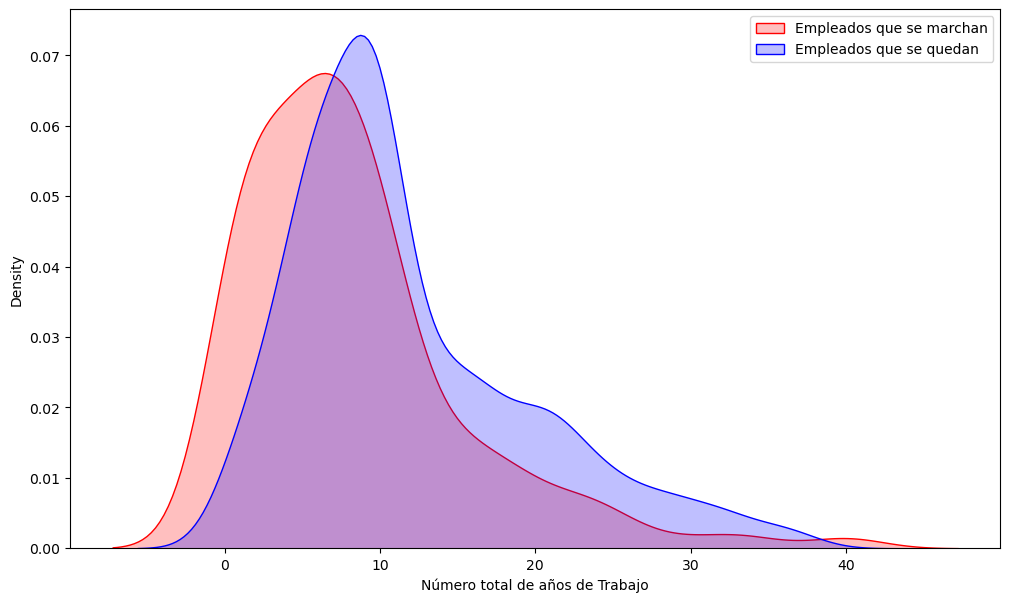

In [19]:
plt.figure(figsize=(12, 7))

sns.kdeplot(left['TotalWorkingYears'], label="Empleados que se marchan", fill=True, color='r')
sns.kdeplot(stayed['TotalWorkingYears'], label="Empleados que se quedan", fill=True, color='b')

plt.legend()
plt.xlabel('Número total de años de Trabajo')


<Axes: xlabel='MonthlyIncome', ylabel='Gender'>

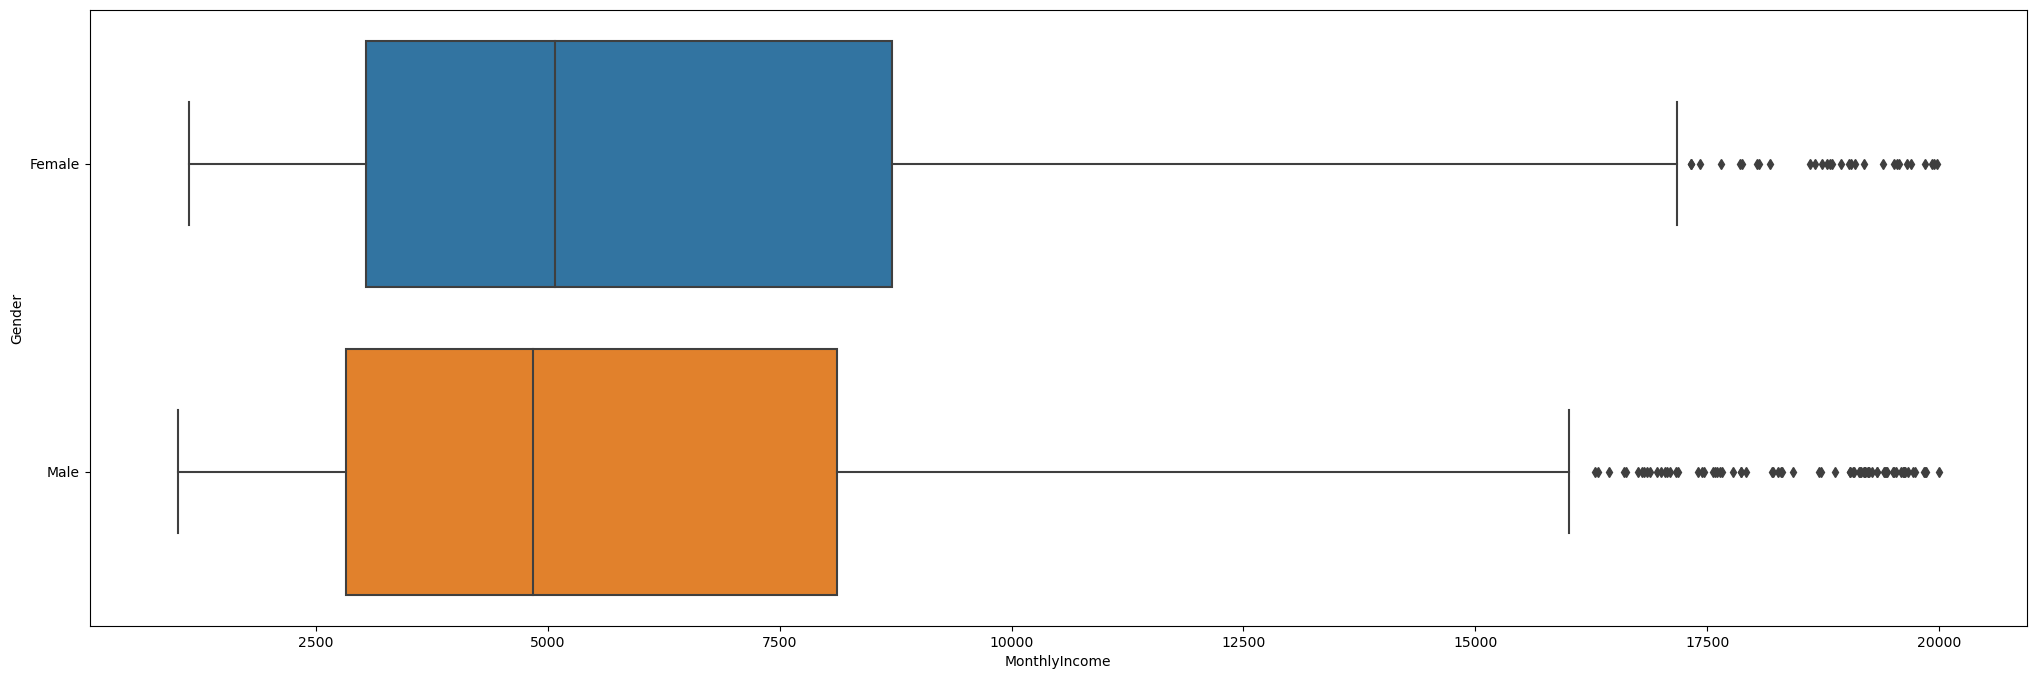

In [20]:
# Veamos el Gender vs. Monthly Income
plt.figure(figsize=(25, 8))

sns.boxplot(x = 'MonthlyIncome', y = 'Gender', data = data)

<Axes: xlabel='MonthlyIncome', ylabel='JobRole'>

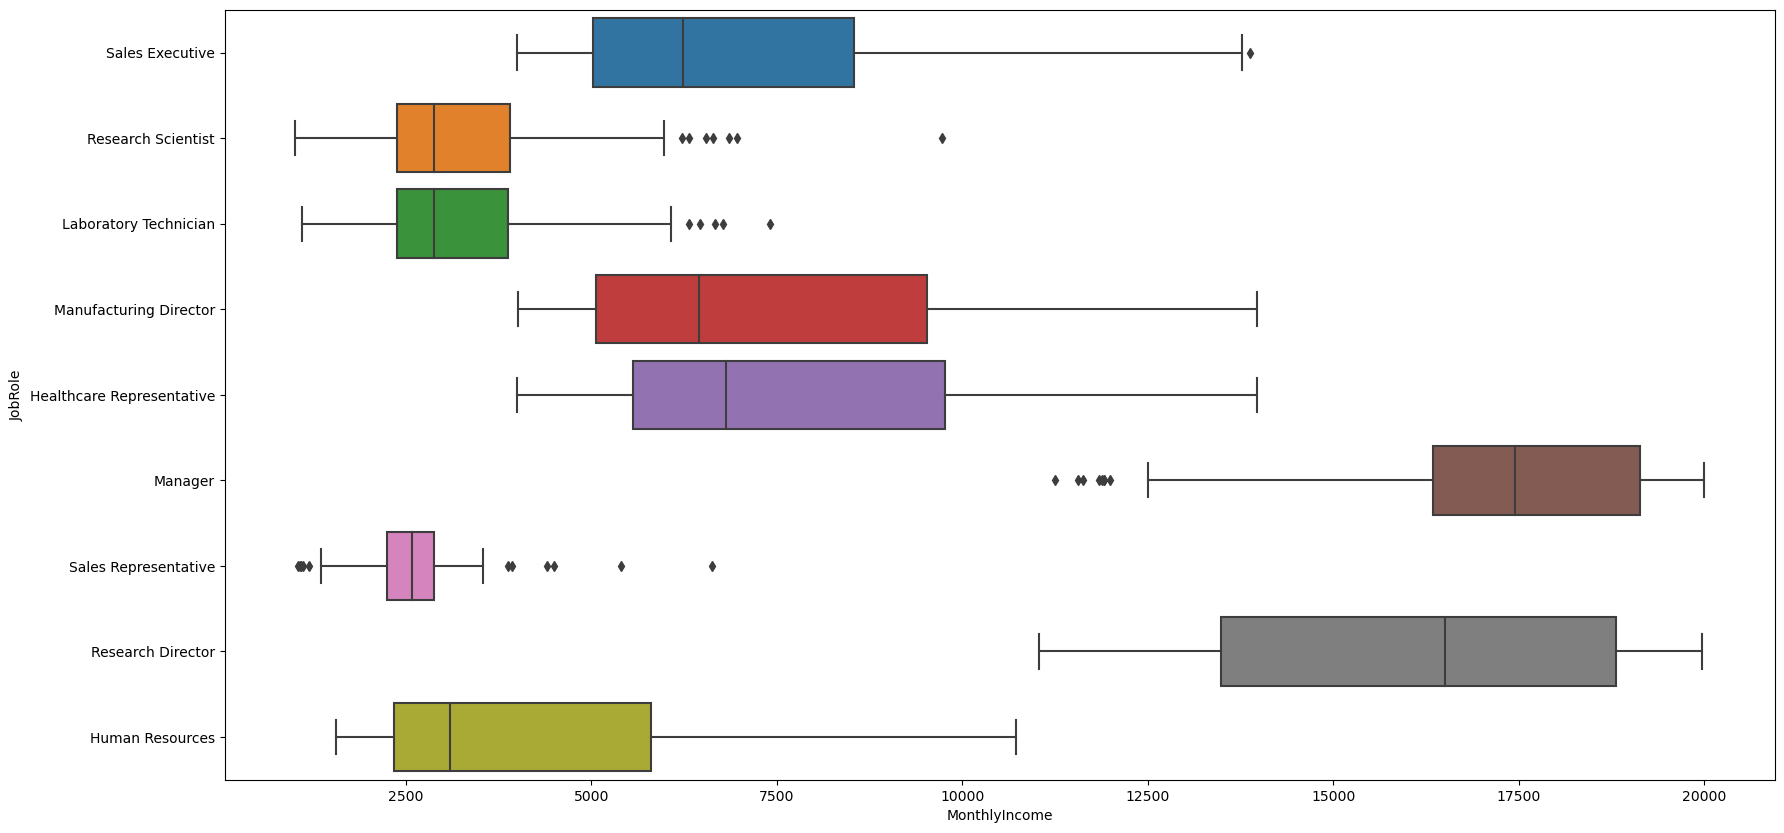

In [21]:
# Veamos el monthly income vs. job role
plt.figure(figsize=(20, 10))
sns.boxplot(x = 'MonthlyIncome', y = 'JobRole', data = data)

# Modelos Predictivos en descubrir a potenciales empleadores en dejar el empleo
- Antes de empezar el machine learning y redes neuronales se realiza el tratamiento en los datos y asi obtener el data set training y testing


In [22]:
data.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0


In [23]:
# DataFrame 'X_cat' que contiene las columnas 'BusinessTravel', 'Department', 
# 'EducationField', 'Gender', 'JobRole' y 'MaritalStatus' del DataFrame 'data'

X_cat = data[['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']]

In [24]:
X_cat

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married
...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married
1466,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married
1467,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married
1468,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married


In [25]:
# Importa la clase OneHotEncoder del módulo preprocessing de la biblioteca scikit-learn
from sklearn.preprocessing import OneHotEncoder 

# Crea una instancia de la clase OneHotEncoder
onehotencoder = OneHotEncoder()

# Aplica el codificador OneHotEncoder al DataFrame X_cat y lo convierte en una matriz numpy
X_cat = onehotencoder.fit_transform(X_cat).toarray()

- Normalizar variables categoricas, Ejemplo: Department  (['Sales', 'Research & Development', 'Human Resources']) las convertimos en 1 2 3 4 - Si empleado pertenece al dep. 2 su fila sera 1 en otro caso es 0.

In [27]:
 X_cat = pd.DataFrame(X_cat) # Crea un nuevo DataFrame llamado 'X_cat' a partir de la matriz 'X_cat'
 X_cat 

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1467,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [28]:
data.Department.unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [30]:
# Notemos que hemos elminado la columna target, 'Atrittion'
X_numerical = data[['Age', 'DailyRate', 'DistanceFromHome',	'Education', 'EnvironmentSatisfaction', 
                    'HourlyRate', 'JobInvolvement',	'JobLevel',	'JobSatisfaction',	'MonthlyIncome',
                    'MonthlyRate',	'NumCompaniesWorked',	'OverTime',	'PercentSalaryHike', 'PerformanceRating',
                    'RelationshipSatisfaction',	'StockOptionLevel',	'TotalWorkingYears'	,'TrainingTimesLastYear'
                    , 'WorkLifeBalance','YearsAtCompany'	,'YearsInCurrentRole', 'YearsSinceLastPromotion',
                    'YearsWithCurrManager']]
X_numerical

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,...,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,...,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,...,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,...,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,1,2,3468,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,2571,...,3,3,1,17,3,3,5,2,0,3
1466,39,613,6,1,4,42,2,3,1,9991,...,3,1,1,9,5,3,7,7,1,7
1467,27,155,4,3,2,87,4,2,2,6142,...,4,2,1,6,0,3,6,2,0,3
1468,49,1023,2,3,4,63,2,2,2,5390,...,3,4,0,17,3,2,9,6,0,8


In [32]:
# Unir los DataFrames X_cat y X_numerical a lo largo del eje horizontal (axis=1) y se crea un DataFrame llamado X_all
X_all = pd.concat([X_cat, X_numerical], axis = 1)
X_all

,0,1,2,3,4,5,6,7,8,9,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,3,1,0,8,0,1,6,4,0,5
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,4,4,1,10,3,3,10,7,1,7
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,3,2,0,7,3,3,0,0,0,0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,3,3,0,8,3,3,8,7,3,0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,3,3,1,17,3,3,5,2,0,3
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,3,1,1,9,5,3,7,7,1,7
1467,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,4,2,1,6,0,3,6,2,0,3
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,3,4,0,17,3,2,9,6,0,8


- Se sabe que X_all es una mezcla de tipos de datos en las columnas (int y str)  y sklearn.preprocessing no puede trabajar con columnas que no sean de tipo str.3

In [33]:
X_all.columns = X_all.columns.astype(str) # Los nombres de las columnas de X_all a cadenas (str)

X_all = X_all.values # el DataFrame X_all se transforma en una matriz numpy


In [36]:
from sklearn.preprocessing import MinMaxScaler # Importamos la clase MinMaxScaler del módulo preprocessing de la biblioteca scikit-learn

scaler = MinMaxScaler() # Se crea una instancia de la clase MinMaxScaler

X = scaler.fit_transform(X_all) # Aplicamos transformación de escala Min-Max al DataFrame X_all y guarda el resultado en X

In [37]:
X

array([[0.        , 0.        , 1.        , ..., 0.22222222, 0.        ,
        0.29411765],
       [0.        , 1.        , 0.        , ..., 0.38888889, 0.06666667,
        0.41176471],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 1.        , ..., 0.11111111, 0.        ,
        0.17647059],
       [0.        , 1.        , 0.        , ..., 0.33333333, 0.        ,
        0.47058824],
       [0.        , 0.        , 1.        , ..., 0.16666667, 0.06666667,
        0.11764706]])

### Variable Dependiente Attrition

In [38]:
y = data['Attrition']
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

# REGRESIÓN LOGÍSTICA,CLASIFICADORES DE BOSQUES ALEATORIOS Y REDES NEURONALES  
    

## - REGRESIÓN LOGÍSTICA

<img src="https://qph.cf2.quoracdn.net/main-qimg-92cb1d347c71244a26c63032198c5e81.webp" width="400">

In [42]:
from sklearn.model_selection import train_test_split 
# Importa la función train_test_split del módulo model_selection de la biblioteca scikit-learn

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
# Se dividen los datos en conjuntos de entrenamiento y prueba utilizando train_test_split
# [X] es la matriz de variables independientes y [Y] es la variable dependiente
# test_size = 0.25 indica que el 25% de los datos se utilizará para el conjunto de prueba
# Los resultados se asignan a las variables X_train, X_test, y_train y y_test respectivamente

In [43]:
X_train.shape

(1102, 50)

In [44]:
X_test.shape

(368, 50)

In [45]:
from sklearn.linear_model import LogisticRegression
# Importa la clase LogisticRegression del módulo linear_model de la biblioteca scikit-learn

from sklearn.metrics import accuracy_score
# Importa la función accuracy_score del módulo metrics de la biblioteca scikit-learn

model = LogisticRegression() # Crea una instancia del modelo de regresión logística

model.fit(X_train, y_train) # Ajusta el modelo de regresión logística utilizando los datos de entrenamiento X_train y y_train


y_pred = model.predict(X_test) # Realiza predicciones utilizando el modelo ajustado en los datos de prueba X_test

In [46]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [47]:
from sklearn.metrics import confusion_matrix, classification_report
# Las funciones confusion_matrix y classification_report del módulo metrics de la biblioteca scikit-learn
print("Accuracy {} %".format(100*accuracy_score(y_pred, y_test)))
# la precisión del modelo en porcentaje utilizando accuracy_score

Accuracy 87.5 %


Text(50.722222222222214, 0.5, 'data_pred')

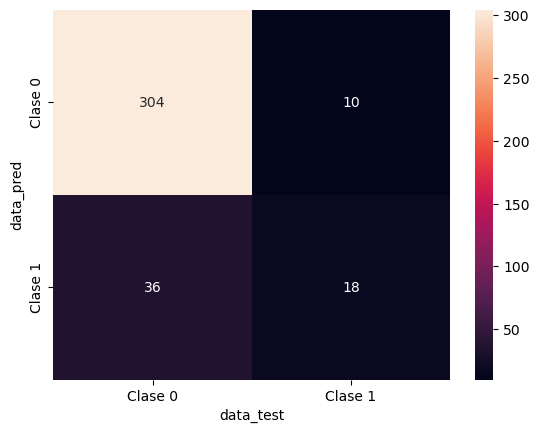

In [48]:
# Resultados en el Conjunto de Testing
class_names = ['Clase 0', 'Clase 1'] # Obtengo los nombres de las etiquetas de las clases
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', 
            xticklabels=class_names, yticklabels=class_names) # Creamos el heatmap con las etiquetas correspondientes en los ejes
plt.xlabel('data_test')
plt.ylabel('data_pred')

In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       314
           1       0.64      0.33      0.44        54

    accuracy                           0.88       368
   macro avg       0.77      0.65      0.68       368
weighted avg       0.86      0.88      0.86       368



## - BOSQUES ALEATORIOS

<img src="https://www.tibco.com/sites/tibco/files/media_entity/2021-05/random-forest-diagram.svg" width="400">

In [51]:
from sklearn.ensemble import RandomForestClassifier
# Importa la clase RandomForestClassifier del módulo ensemble de la biblioteca scikit-learn

model = RandomForestClassifier() # Se crea una instancia del modelo de clasificación Random Forest
model.fit(X_train, y_train) # Ajusta el modelo Random Forest utilizando los datos de entrenamiento X_train y y_train
y_pred = model.predict(X_test) # Realiza predicciones utilizando el modelo ajustado en los datos de prueba X_test

Text(50.722222222222214, 0.5, 'data_pred')

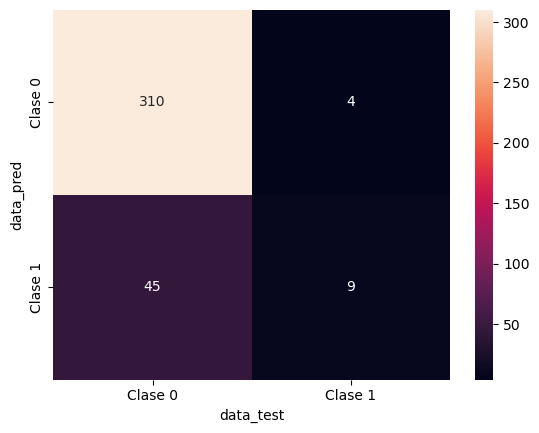

In [52]:
# Resultados en el Conjunto de Testing
class_names = ['Clase 0', 'Clase 1'] # Obtener los nombres de las etiquetas de las clases
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', 
            xticklabels=class_names, yticklabels=class_names) # Crear el heatmap con las etiquetas correspondientes en los ejes
plt.xlabel('data_test')
plt.ylabel('data_pred')

In [53]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93       314
           1       0.69      0.17      0.27        54

    accuracy                           0.87       368
   macro avg       0.78      0.58      0.60       368
weighted avg       0.85      0.87      0.83       368



 ## -  DEEP LEARNING

<img src="https://www.iartificial.net/wp-content/uploads/2019/02/tipos_redes-1024x432.jpg" width="700">

In [54]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential

model = Sequential([
    Dense(units=500, activation='relu', input_shape=(50,)), 
    Dropout(0.2),
    Dense(units=500, activation='relu'), 
    Dropout(0.2),
    Dense(units=500, activation='relu'),
    Dropout(0.2),
    Dense(units=1, activation='sigmoid')
])
# Crea un modelo secuencial utilizando la clase Sequential de Keras
# El modelo consiste en una serie de capas densas (fully connected) y capas de dropout
# La capa de entrada tiene 50 unidades (características) y se utiliza la función de activación 'relu'
# Se aplica dropout con una tasa del 0.2 para reducir el sobreajuste
# Las capas ocultas también tienen 500 unidades y utilizan la función de activación 'relu'
# La capa de salida tiene una unidad y utiliza la función de activación 'sigmoid'

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Compila el modelo especificando el optimizador, la función de pérdida y las métricas a utilizar
# Se utiliza el optimizador 'adam', la pérdida 'binary_crossentropy' (para un problema de clasificación binaria)
# y se mide la precisión como métrica de evaluación


# Entrenar el modelo
epochs_hist = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))
# El modelo utiliza los datos de entrenamiento (X_train, y_train)
# Se especifica el número de épocas (100), el tamaño del lote (32) y se proporcionan los datos de validación (X_test, y_test)
# El historial del entrenamiento se guarda en la variable epochs_hist


Epoch 1/100
35/35 [==============================] - 1s 14ms/step - loss: 0.4132 - accuracy: 0.8385 - val_loss: 0.3180 - val_accuracy: 0.8696
Epoch 2/100
35/35 [==============================] - 0s 9ms/step - loss: 0.3664 - accuracy: 0.8584 - val_loss: 0.3424 - val_accuracy: 0.8696
Epoch 3/100
35/35 [==============================] - 0s 8ms/step - loss: 0.3340 - accuracy: 0.8702 - val_loss: 0.3068 - val_accuracy: 0.8750
Epoch 4/100
35/35 [==============================] - 0s 7ms/step - loss: 0.2957 - accuracy: 0.8884 - val_loss: 0.2900 - val_accuracy: 0.8913
Epoch 5/100
35/35 [==============================] - 0s 7ms/step - loss: 0.2776 - accuracy: 0.8947 - val_loss: 0.2878 - val_accuracy: 0.8886
Epoch 6/100
35/35 [==============================] - 0s 8ms/step - loss: 0.2457 - accuracy: 0.9011 - val_loss: 0.4067 - val_accuracy: 0.8777
Epoch 7/100
35/35 [==============================] - 0s 8ms/step - loss: 0.2420 - accuracy: 0.9047 - val_loss: 0.3652 - val_accuracy: 0.8804
Epoch 8/100


Epoch 59/100
35/35 [==============================] - 0s 7ms/step - loss: 0.0026 - accuracy: 0.9991 - val_loss: 1.2080 - val_accuracy: 0.8614
Epoch 60/100
35/35 [==============================] - 0s 7ms/step - loss: 0.0029 - accuracy: 0.9991 - val_loss: 1.1974 - val_accuracy: 0.8696
Epoch 61/100
35/35 [==============================] - 0s 7ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 1.2288 - val_accuracy: 0.8696
Epoch 62/100
35/35 [==============================] - 0s 7ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 1.2573 - val_accuracy: 0.8587
Epoch 63/100
35/35 [==============================] - 0s 7ms/step - loss: 9.8121e-04 - accuracy: 1.0000 - val_loss: 1.3209 - val_accuracy: 0.8668
Epoch 64/100
35/35 [==============================] - 0s 7ms/step - loss: 0.0284 - accuracy: 0.9936 - val_loss: 1.2775 - val_accuracy: 0.8804
Epoch 65/100
35/35 [==============================] - 0s 7ms/step - loss: 0.0067 - accuracy: 0.9991 - val_loss: 1.1656 - val_accuracy: 0.8505
Ep

In [69]:
y_pred = model.predict(X_test)
y_pred

12/12 [==============================] - 0s 2ms/step


array([[1.00000000e+00],
       [1.19218236e-14],
       [9.91253793e-01],
       [8.60984315e-08],
       [4.01577688e-10],
       [7.57231176e-01],
       [8.37660039e-08],
       [1.13783400e-17],
       [4.86781516e-07],
       [3.04338668e-04],
       [4.68885014e-18],
       [4.95396262e-06],
       [1.50909671e-03],
       [1.21771097e-02],
       [1.10051711e-03],
       [1.84471637e-03],
       [2.81850563e-12],
       [1.92373642e-04],
       [2.54634448e-04],
       [9.57775130e-27],
       [3.28284405e-05],
       [9.91508663e-01],
       [1.04594591e-08],
       [7.41159525e-08],
       [3.78609798e-17],
       [1.19073718e-06],
       [9.22275831e-06],
       [6.29300434e-09],
       [8.92936896e-06],
       [4.63044898e-06],
       [2.68785638e-09],
       [1.08823490e-14],
       [9.99982953e-01],
       [9.33675165e-06],
       [5.92827007e-07],
       [9.93292542e-06],
       [4.20721290e-06],
       [2.39046231e-11],
       [6.37253506e-15],
       [1.67363682e-12],


In [74]:
y_pred = (y_pred > 0.5)


In [77]:
y_test

100     1
956     0
777     1
1069    0
906     0
       ..
673     0
1424    0
1272    0
198     0
1035    0
Name: Attrition, Length: 368, dtype: int64

In [78]:
y_pred

array([[ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [

In [79]:
epochs_hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

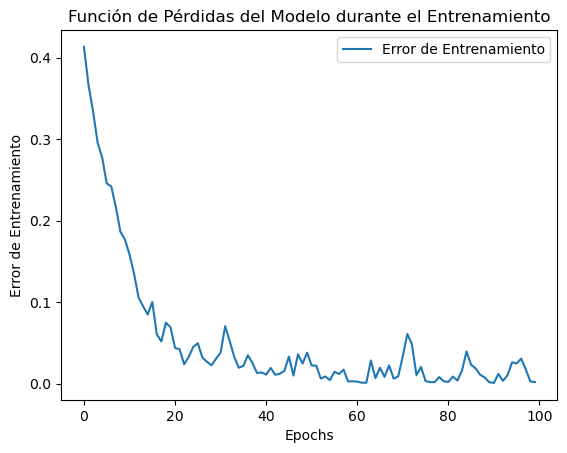

In [80]:
plt.plot(epochs_hist.history['loss'])
plt.title("Función de Pérdidas del Modelo durante el Entrenamiento")
plt.xlabel("Epochs")
plt.ylabel("Error de Entrenamiento")
plt.legend(["Error de Entrenamiento"])

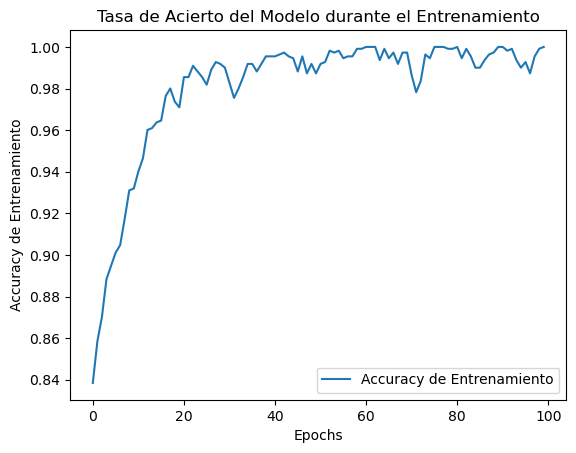

In [81]:
plt.plot(epochs_hist.history['accuracy'])
plt.title("Tasa de Acierto del Modelo durante el Entrenamiento")
plt.xlabel("Epochs")
plt.ylabel("Accuracy de Entrenamiento")
plt.legend(["Accuracy de Entrenamiento"])

Text(50.722222222222214, 0.5, 'data_pred')

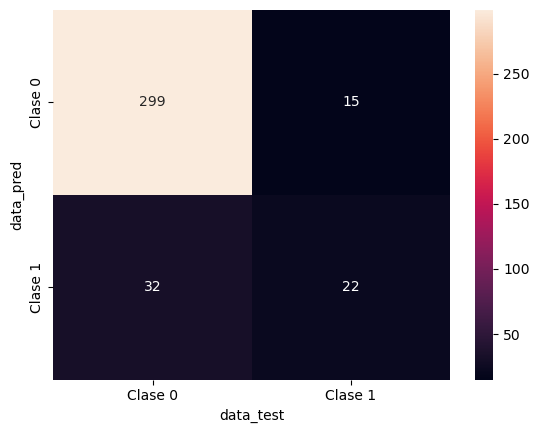

In [82]:
# Resultados en el Conjunto de Testing
class_names = ['Clase 0', 'Clase 1'] # Obtener los nombres de las etiquetas de las clases
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', 
            xticklabels=class_names, yticklabels=class_names) # Crear el heatmap con las etiquetas correspondientes en los ejes
plt.xlabel('data_test')
plt.ylabel('data_pred')

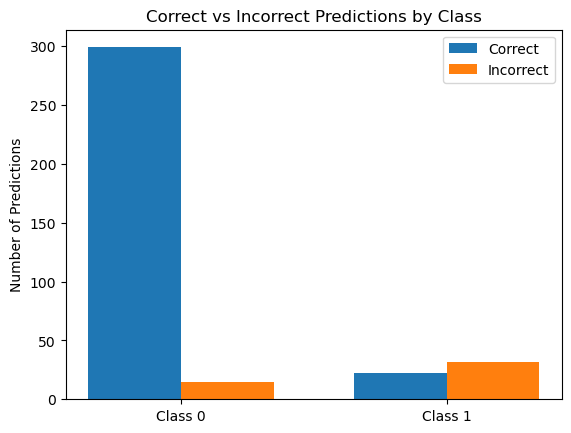

In [83]:
# Obtener resultados correctos e incorrectos por clase
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
correct = [tn, tp]
incorrect = [fp, fn]
# Crear gráfico de barras
x = np.arange(len(correct))
width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, correct, width, label='Correct')
rects2 = ax.bar(x + width/2, incorrect, width, label='Incorrect')
# Agregar etiquetas, títulos y leyendas
ax.set_xticks(x)
ax.set_xticklabels(['Class 0', 'Class 1'])
ax.legend()
ax.set_ylabel('Number of Predictions')
ax.set_title('Correct vs Incorrect Predictions by Class')
plt.show() # Mostrar gráfico


In [84]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.95      0.93       314
           1       0.59      0.41      0.48        54

    accuracy                           0.87       368
   macro avg       0.75      0.68      0.71       368
weighted avg       0.86      0.87      0.86       368



- Precisión (precision): La precisión es la proporción de predicciones correctas (verdaderos positivos) respecto al total de predicciones positivas. En este caso, se obtuvo una precisión del 90% para la clase 0 y del 59% para la clase 1. Esto significa que el 90% de las predicciones para la clase 0 fueron correctas, mientras que para la clase 1 solo el 59% de las predicciones fueron correctas.

- Recall (sensibilidad o exhaustividad): El recall es la proporción de instancias positivas reales (verdaderos positivos) que fueron identificadas correctamente por el modelo. En este caso, se obtuvo un recall del 95% para la clase 0 y del 41% para la clase 1. Esto significa que el modelo pudo identificar correctamente el 95% de las instancias positivas reales de la clase 0, mientras que para la clase 1 solo pudo identificar el 41%.

- F1-score: El F1-score es una medida que combina la precisión y el recall en una sola métrica. Representa la media armónica entre ambos valores y proporciona una medida del equilibrio entre precisión y recall. En este caso, se obtuvo un F1-score del 0.93 para la clase 0 y del 0.48 para la clase 1.

- Soporte (support): El soporte indica la cantidad de instancias de cada clase en el conjunto de prueba. En este caso, hay 314 instancias de la clase 0 y 54 instancias de la clase 1.

- Exactitud (accuracy): La exactitud es la proporción de predicciones correctas respecto al total de predicciones. En este caso, se obtuvo una exactitud del 87%. Esto significa que el 87% de las predicciones realizadas por el modelo fueron correctas.

- Promedio ponderado (weighted avg): El promedio ponderado toma en cuenta la cantidad de instancias de cada clase al calcular las métricas. En este caso, se obtuvo un promedio ponderado de precisión, recall y F1-score del 86%. Esto indica un rendimiento general del modelo teniendo en cuenta el desequilibrio entre las clases.

En general, un modelo de clasificación ideal tendría valores altos en todas las métricas, pero en la práctica, a menudo se necesita un equilibrio entre la precisión y el recall en función del contexto y los requisitos de la aplicación.
Además, la "macro avg" y la "weighted avg" son promedios de las métricas para ambas clases. La "macro avg" calcula la media de las métricas para cada clase por separado y luego toma la media de esos valores, mientras que la "weighted avg" calcula la media de las métricas para cada clase por separado y luego toma una media ponderada por el número de muestras en cada clase.


## El objetivo del estudio era lograr tener una predicción sobre que empleados dejarian el trabajo.
### Los Modelos Predictivos creados estan utilizables por ende no hay un cambio significativo de uno a otro. 
